## Support Vector Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Increasing the size of all graphs 
plt.rcParams['figure.figsize'] = 16, 10

In [2]:
#Suppressing unnecessary warnings
import warnings
warnings.filterwarnings(action="ignore") 

In [3]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
rows, columns = dataset.shape
# We specify [:, 1:2] instead of just [:,1] because we want X to be a matrix and not just a vector of values
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, (columns - 1)].values
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
# Checking out the values of X and y
print("X Values")
print(X[:5])
print("\nY Values")
print(y[:5])

X Values
[[1]
 [2]
 [3]
 [4]
 [5]]

Y Values
[ 45000  50000  60000  80000 110000]


Note : We are not going to split the data into training set and test set
because we do not have too much data to make this division and we need to
make a very accurate prediction.

In [5]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [6]:
print("X Values")
print(X[:5])
print("\nY Values")
print(y[:5])

X Values
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]]

Y Values
[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815]


In [7]:
# Fitting SVR to the dataset

from sklearn.svm import SVR
# We need a non-linear kernal
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

##### Predicting a new result for 6.5 level employee
We need to transform the value of level for which we want to predict the salary because we had previously done feature scaling.
We also sending an np.array to the transform because it expects an array object in the function.
We cannot use [ ] because that makes it a vector.

In [8]:
X_transformed_value = sc_X.transform(np.array([6.5]))
y_pred = regressor.predict(X_transformed_value)
print(y_pred)

[-0.27861589]


/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Now as we can see the value above needs to be scaled back to the original scaling 
as we had performed feature scaling during our preprdcessing. To do this we will use the inverse transform
function of StandardScaler

In [9]:
y_new_pred = sc_y.inverse_transform(y_pred)
print(y_new_pred)

[ 170370.0204065]


The employee mentioned that his salary was 160,000. The prediciton is pretty close to the actual salary.

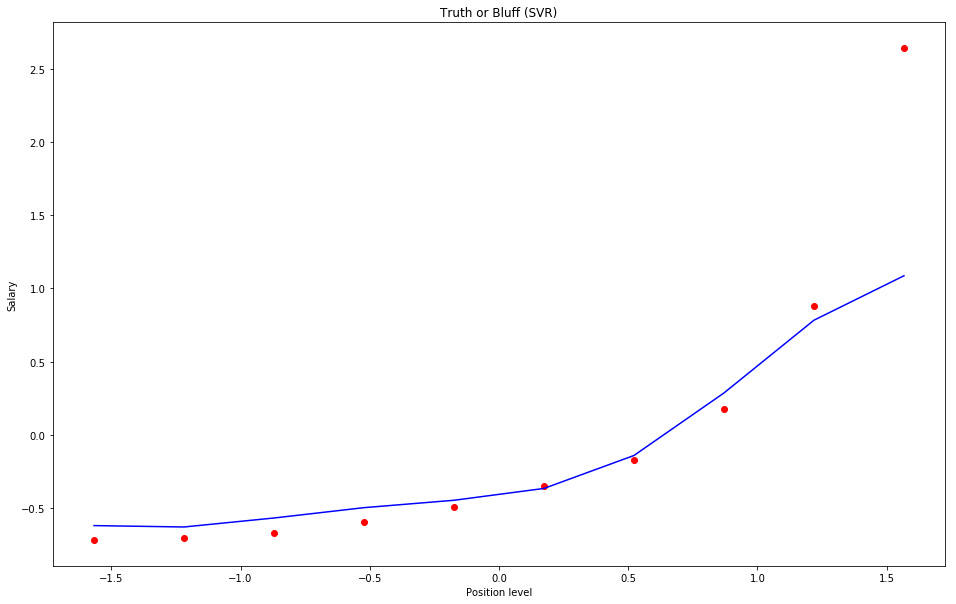

In [10]:
# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In the above graph we can see that the regression line does not extend till the ceo data point.
This is because the SVR has a penalty parameter and it is treating the ceo data point as a outlier in the dataset. 

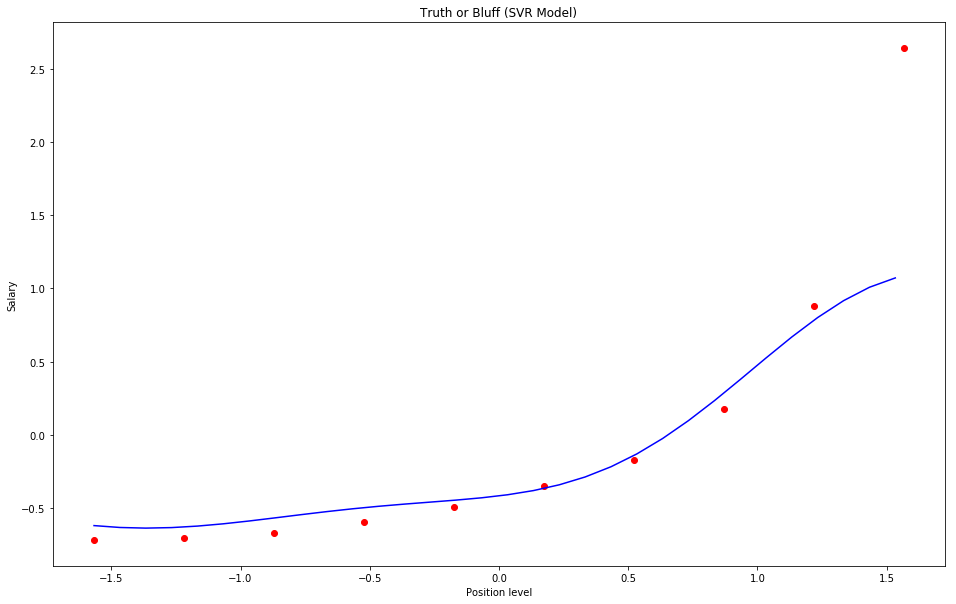

In [11]:
# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()